In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()


T    TM   Tm     SLP     H   VV    V    VM     PM 2.5
0  12.8  22.6  4.0  1020.0  75.0  1.3  2.0   9.4  60.436250
1  13.8  23.0  6.5  1020.7  79.0  1.1  0.9   3.5  47.497083
2  13.5  23.4  6.7  1021.3  83.0  0.6  7.2  22.2  48.394583
3  13.2  20.0  7.1  1019.9  88.0  0.8  3.7   9.4  57.945417
4  13.6  20.1  7.0  1017.5  85.0  0.8  6.9  14.8  60.902500

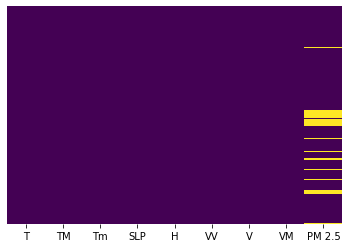

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0    False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
888  False  False  False  False  False  False  False  False
889  False  False  False  False  False  False  False  False
890  False  False  False  False  False  False  False  False
891  False  False  False  False  False  False  False  False
892  False  False  False  False  False  False  False  False

[801 rows x 8 columns]

In [8]:
y.isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
888    False
889    False
890    False
891    False
892    False
Name: PM 2.5, Length: 801, dtype: bool

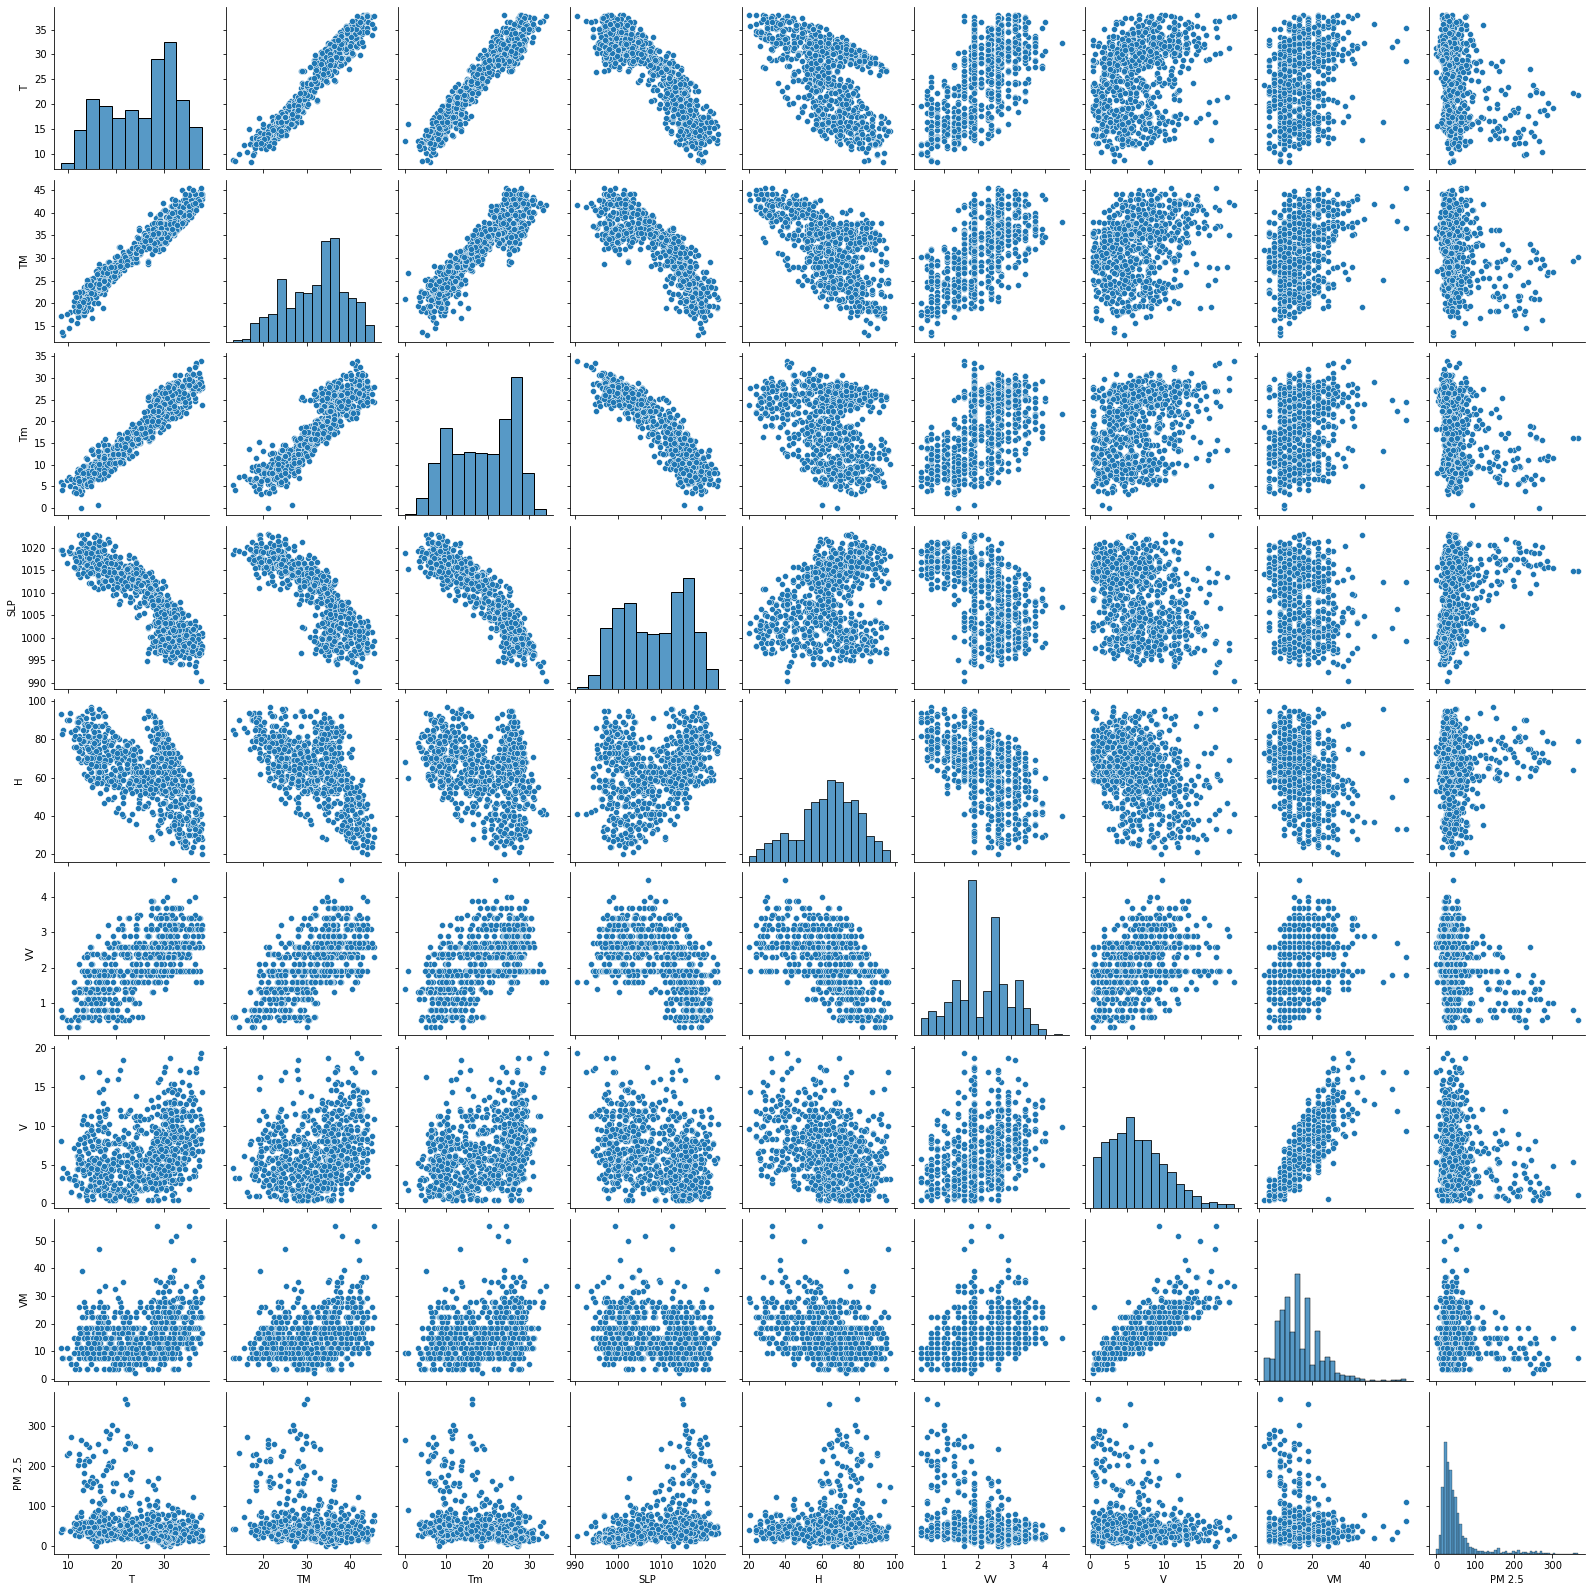

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.965654  0.952481 -0.884520 -0.542981  0.648102  0.306993   
TM      0.965654  1.000000  0.892373 -0.834988 -0.606840  0.617572  0.283873   
Tm      0.952481  0.892373  1.000000 -0.914488 -0.321380  0.550158  0.302561   
SLP    -0.884520 -0.834988 -0.914488  1.000000  0.291176 -0.514929 -0.309846   
H      -0.542981 -0.606840 -0.321380  0.291176  1.000000 -0.552225 -0.336072   
VV      0.648102  0.617572  0.550158 -0.514929 -0.552225  1.000000  0.379118   
V       0.306993  0.283873  0.302561 -0.309846 -0.336072  0.379118  1.000000   
VM      0.275843  0.286975  0.241312 -0.260956 -0.365865  0.333477  0.826139   
PM 2.5 -0.347176 -0.321148 -0.351656  0.379463  0.108396 -0.355831 -0.194147   

              VM    PM 2.5  
T       0.275843 -0.347176  
TM      0.286975 -0.321148  
Tm      0.241312 -0.351656  
SLP    -0.260956  0.379463  
H      -0.365865  0.108396  
VV      0.333477 -0.355831  
V       0.826139 -0.194147  
VM      1.000000 -0.158485  
PM 2.5 -0.158485  1.000000

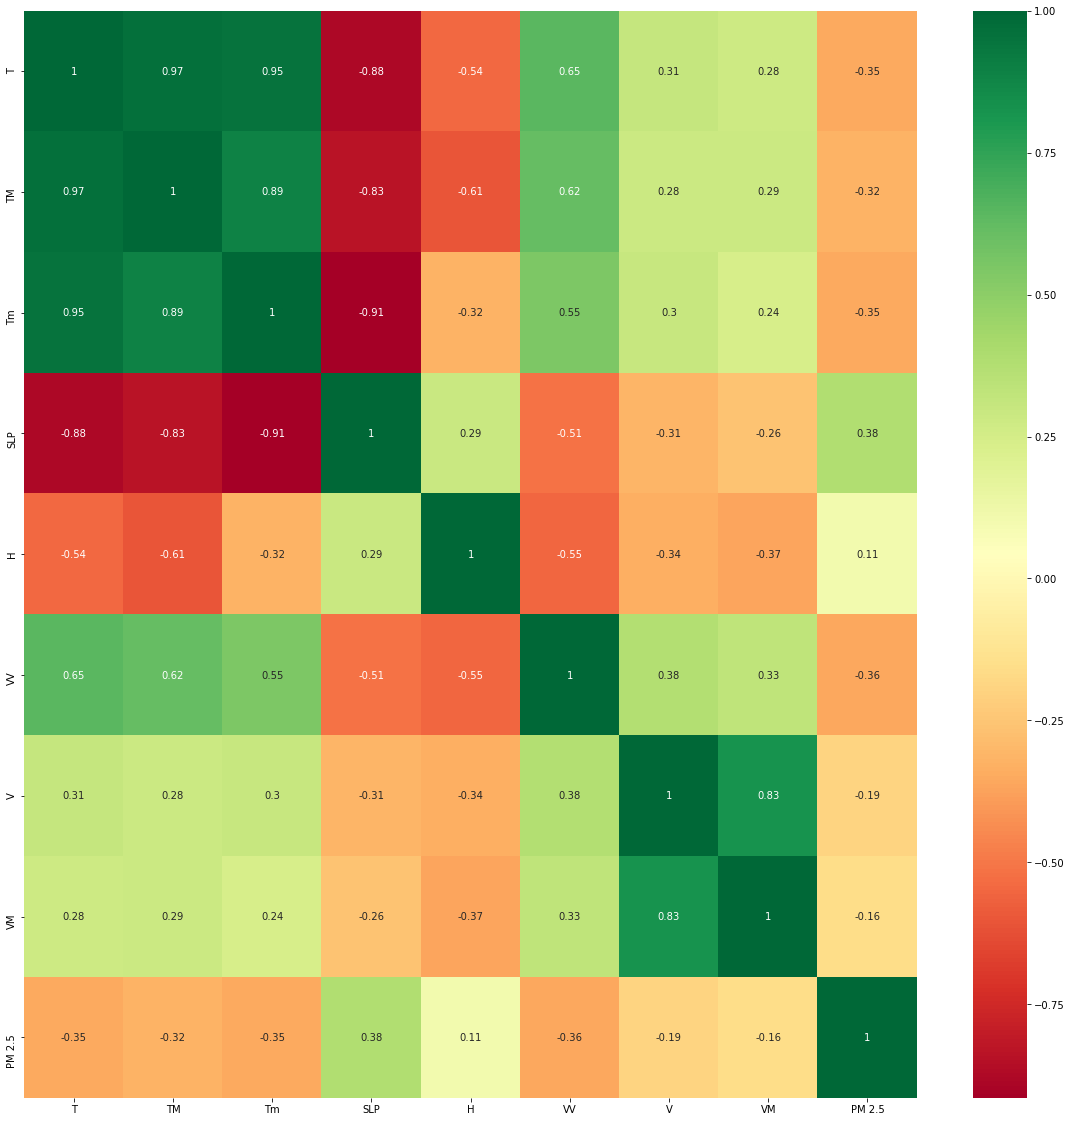

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0  12.8  22.6  4.0  1020.0  75.0  1.3  2.0   9.4
1  13.8  23.0  6.5  1020.7  79.0  1.1  0.9   3.5
2  13.5  23.4  6.7  1021.3  83.0  0.6  7.2  22.2
3  13.2  20.0  7.1  1019.9  88.0  0.8  3.7   9.4
4  13.6  20.1  7.0  1017.5  85.0  0.8  6.9  14.8

In [15]:
print(model.feature_importances_)

[0.12611504 0.12031202 0.13264287 0.13492603 0.14798852 0.16149207
 0.08914719 0.08737625]


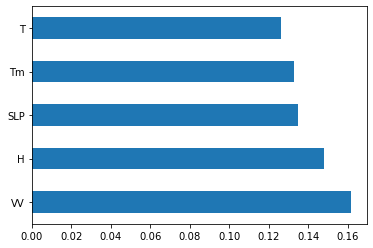

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


# ANN

C:\Users\adars\anaconda3\envs\sk\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


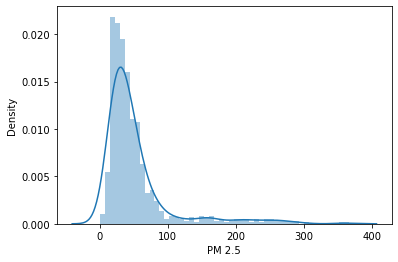

In [17]:
sns.distplot(y)
plt.show()


### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [20]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 2s 15ms/step - loss: 30.2402 - mean_absolute_error: 30.2402 - v

Epoch 44/100
38/38 [==============================] - 0s 3ms/step - loss: 26.8946 - mean_absolute_error: 26.8946 - val_loss: 25.1872 - val_mean_absolute_error: 25.1872
Epoch 45/100
38/38 [==============================] - 0s 3ms/step - loss: 27.7879 - mean_absolute_error: 27.7879 - val_loss: 25.8000 - val_mean_absolute_error: 25.8000
Epoch 46/100
38/38 [==============================] - 0s 3ms/step - loss: 27.0082 - mean_absolute_error: 27.0082 - val_loss: 24.8405 - val_mean_absolute_error: 24.8405
Epoch 47/100
38/38 [==============================] - 0s 4ms/step - loss: 26.8340 - mean_absolute_error: 26.8340 - val_loss: 24.7872 - val_mean_absolute_error: 24.7872
Epoch 48/100
38/38 [==============================] - 0s 4ms/step - loss: 26.9904 - mean_absolute_error: 26.9904 - val_loss: 24.7784 - val_mean_absolute_error: 24.7784
Epoch 49/100
38/38 [==============================] - 0s 3ms/step - loss: 27.1814 - mean_absolute_error: 27.1814 - val_loss: 24.7918 - val_mean_absolute_error: 

Epoch 93/100
38/38 [==============================] - 0s 4ms/step - loss: 26.8177 - mean_absolute_error: 26.8177 - val_loss: 25.0324 - val_mean_absolute_error: 25.0324
Epoch 94/100
38/38 [==============================] - 0s 4ms/step - loss: 27.0313 - mean_absolute_error: 27.0313 - val_loss: 25.1549 - val_mean_absolute_error: 25.1549
Epoch 95/100
38/38 [==============================] - 0s 4ms/step - loss: 26.7274 - mean_absolute_error: 26.7274 - val_loss: 25.5901 - val_mean_absolute_error: 25.5901
Epoch 96/100
38/38 [==============================] - 0s 4ms/step - loss: 27.0825 - mean_absolute_error: 27.0825 - val_loss: 24.8357 - val_mean_absolute_error: 24.8357
Epoch 97/100
38/38 [==============================] - 0s 4ms/step - loss: 26.6252 - mean_absolute_error: 26.6252 - val_loss: 24.5997 - val_mean_absolute_error: 24.5997
Epoch 98/100
38/38 [==============================] - 0s 4ms/step - loss: 26.7320 - mean_absolute_error: 26.7320 - val_loss: 24.9831 - val_mean_absolute_error: 

#### Model evaluation

In [21]:
prediction=NN_model.predict(X_test)

In [22]:
y_test

8       46.778333
254     63.000000
85      26.574167
409     35.517917
14      39.525833
          ...    
809     19.408750
698     25.429167
659    102.795000
35      70.677083
81      25.980000
Name: PM 2.5, Length: 241, dtype: float64

C:\Users\adars\anaconda3\envs\sk\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


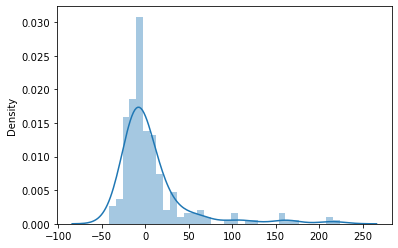

In [23]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)
plt.show()

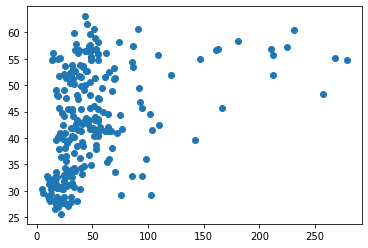

In [24]:
plt.scatter(y_test,prediction)
plt.show()

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.753340858786597
MSE: 1830.14974866784
RMSE: 42.78024951619427
